In [1]:
import numpy as np
import matplotlib.pyplot as plt


(-0.05, 0.8)

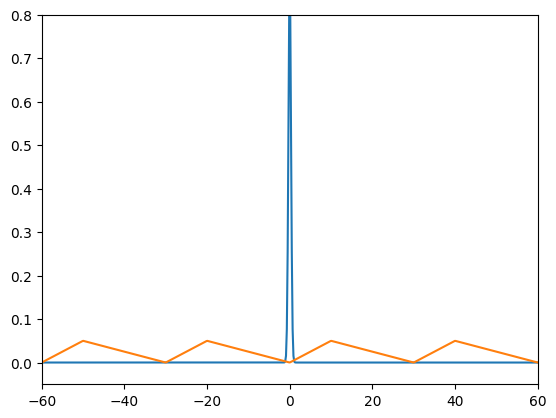

In [78]:
D=10
def rho(x,t):
	B=1/(np.sqrt(2*np.pi)* np.sqrt(2*D*t))
	a=1/(2*D*(t))
	return B*np.exp(-a*x**2)

def rachet(x):
	x2=x%30

	x3=x2<10
	x4=x2>10
	# print(x3)
	# x2/10*x3
	return (x2/10*x3-x2/20*x4+1.5*x4)*0.05

	

x=np.linspace(-100,100,1000)

plt.plot(x,rho(x,0.01))
plt.plot(x,rachet(x))
plt.xlim(-60,60)
plt.ylim(-0.05,0.8)

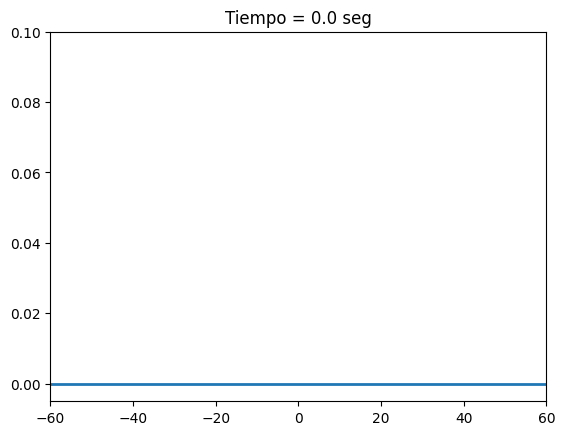

MovieWriter imagemagick unavailable; using Pillow instead.


In [80]:
#make an animation showing rho for different times
import matplotlib.animation as anim
fig=plt.figure()
ax=plt.axes(xlim=(-60,60),ylim=(-0.005,0.5))
line,=ax.plot([],[],lw=2)
line2,=ax.plot([],[],lw=2)
line3,=ax.plot([],[], linestyle='--', color='gray', alpha=0.8)
line4,=ax.plot([],[], linestyle='--', color='gray', alpha=0.8)
line5,=ax.plot([],[], linestyle='--', color='gray', alpha=0.8)
#make line3 ve a doted vertical line


total_frames=400
total_time=15

def animate(i):

	time=i/total_frames*total_time+0.00000000000001

	x=np.linspace(-100,100,1000)
	y=rho(x,time)
	
	if time>5:
		line2.set_data(x,rachet(x))
		line3.set_data([10,10],[-0.005,1])
		line4.set_data([30,30],[-0.005,1])
		line5.set_data([40,40],[-0.005,1])
		y=rho(x,5)
		ax.set_title(f'Tiempo = {5} seg')
	else:
		# line2.set_data([],[])
		y=rho(x,time)
		ax.set_title(f'Tiempo = {round((i/total_frames)*total_time, 1)} seg')

	line.set_data(x,y)
	
	ax.set_ylim(-0.005,0.1)
	return line,
ani=anim.FuncAnimation(fig,animate,frames=total_frames,interval=20,blit=True)
plt.show()
ani.save('rho.gif',writer='imagemagick',fps=30)
